KANIA ARDHANI PUTRI

1301204140

JIKA INGIN MENJALANKAN DI GOOGLE COLLAB FILE "cats-and_dogs_filteres.zip" HARUS DI UPLOD DULU, KALAU TIDAK SEPERTINYA TIDAK BISA BERJALAN

Lebih baik di Runtime : Jalankan Semua, mengurangi terjadinya kode error/tidak berjalan

File Testing : /content/drive/MyDrive/woof_meow.jpg
https://drive.google.com/file/d/1AzMSNUndco6ChykLCtqGcRBENPWXLum3/view?usp=share_link

Link Colab : https://colab.research.google.com/drive/1U8ENdGx_HexZyYiJAd3_VaawERw6Uayq?usp=sharing

**USING** **SVM** **to classify dogs and cats based on images.**

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-04-05 05:49:09--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.128, 142.251.162.128, 173.194.213.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   167MB/s    in 0.4s    

2023-04-05 05:49:09 (167 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [1]:
# Importing the necessary libraries
import os
import zipfile
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [14]:
local_zip = '/content/drive/MyDrive/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
##### Image preprocessing: only rescale the image #####
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Importing the images from the dataset
training_set = train_datagen.flow_from_directory("/tmp/cats_and_dogs_filtered",
                                                 target_size = (150,150),
                                                 batch_size = 20,
                                                 class_mode = "binary")

test_set = test_datagen.flow_from_directory("/tmp/cats_and_dogs_filtered",
                                   target_size = (150,150),
                                   batch_size = 20,
                                   class_mode = "binary")

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 3000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
#Looking at the Output of Image Data Generator

for data_batch, labels_batch in validation_generator:
  print('Data Batch Shape', data_batch.shape)
  print('Labels Batch Shape', labels_batch.shape)
  break

Data Batch Shape (20, 150, 150, 3)
Labels Batch Shape (20,)


In [10]:
# Setting the model cost function, optimizer and metrics
model.compile(optimizer = "adam", loss = "hinge", metrics = ["accuracy"])

In [11]:
# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [12]:
# Saving trained model
model.save('Dogs-vs-Cats_model.h5')

In [22]:
# Add the image to a batch where it's the only member.
model = (np.expand_dims(model,0))

print(model.shape)

(1, 1)


In [ ]:
# Model training
r = model.fit(x = training_set, validation_data = test_set, epochs = 35)

Epoch 1/35
150/150 [==============================] - 50s 325ms/step - loss: 0.0282 - accuracy: 0.9927 - val_loss: 0.0198 - val_accuracy: 0.9983
Epoch 2/35
150/150 [==============================] - 47s 313ms/step - loss: 0.0213 - accuracy: 0.9963 - val_loss: 0.0161 - val_accuracy: 0.9973
Epoch 3/35
150/150 [==============================] - 47s 317ms/step - loss: 0.0266 - accuracy: 0.9943 - val_loss: 0.0238 - val_accuracy: 0.9910
Epoch 4/35
150/150 [==============================] - 47s 313ms/step - loss: 0.0182 - accuracy: 0.9973 - val_loss: 0.0172 - val_accuracy: 0.9983
Epoch 5/35
150/150 [==============================] - 48s 318ms/step - loss: 0.0176 - accuracy: 0.9973 - val_loss: 0.0183 - val_accuracy: 0.9943
Epoch 6/35
150/150 [==============================] - 41s 274ms/step - loss: 0.0263 - accuracy: 0.9933 - val_loss: 0.0144 - val_accuracy: 0.9987
Epoch 7/35
150/150 [==============================] - 47s 310ms/step - loss: 0.0262 - accuracy: 0.9923 - val_loss: 0.0184 - val_ac

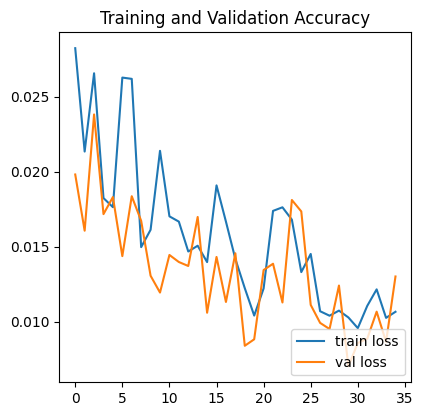

<Figure size 640x480 with 0 Axes>

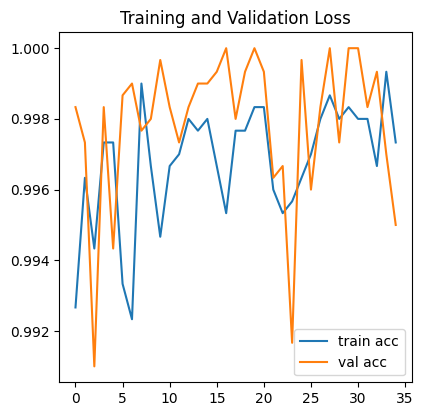

<Figure size 640x480 with 0 Axes>

In [ ]:
#visualization 
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']

epochs_range = range(35)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend(loc='upper right')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.evaluate(x=training_set)

150/150 [==============================] - 16s 105ms/step - loss: 0.0130 - accuracy: 0.9950


[0.013026382774114609, 0.9950000047683716]

In [ ]:
# Save it as a h5 file

model.save('model_rcat_dog.h5')

In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_rcat_dog.h5')

In [ ]:
# Lets see the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 75, 75, 20)        560       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 37, 37, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 37, 37, 20)        3620      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 18, 18, 20)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 6480)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [ ]:
# Testing

test_generator = test_datagen.flow_from_directory(base_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 3000 images belonging to 2 classes.


<ipython-input-46-239928bbc977>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.6200000047683716


In [20]:
# Testing

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/woof_meow.jpg', target_size = (150,150,3))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)


1/1 [==============================] - 0s 370ms/step


In [ ]:
result

array([[0.49577028]], dtype=float32)

In [ ]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")
     

The image classified is dog
